#### Pruebas usando los datos de Chile del dataset Manifesto Project

#### Objetivo: validar la consistencia de los datos con la realidad en el tiempo observada en Chile
#### Método:
* 1.Se filtra el dataset para dejar solamente los registros con 'countryname' = Chile
* 2.Para cada año eleccionario se calcula el promedio ponderado de las variables 'per' de cada candidato usando como peso la columna 'presvote', que representa el porcentaje de votos obtenido por cada programa en la 1a vuelta (presvote)
* Se definen los siguientes aspectos para analizar su evolución a lo largo de los períodos eleccionarios disponibles para Chile: 1989 a 2021
*       * Inclusión y Minorías
*       * Orden y Corrupción
*       * Medio Ambiente y Sostenibilidad
*       * Pueblos Originarios
*       * Derechos Humanos
*       * Inmigración
*       * Moral Tradicional 
* Se grafica el resultado para cada aspecto y también un gráfico agregado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
file_path = "data/MPDataset_MPDS2024a.csv"
df = pd.read_csv(file_path)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_9195/3164128165.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
# Display the first few rows of the DataFrame
df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,NaN,9.60,1.9,1.900,0.0,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,NaN,-37.80,3.3,2.200,33.4,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,...,NaN,NaN,NaN,9.50,3.2,6.400,14.3,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,NaN,60,...,NaN,NaN,NaN,28.00,1.8,22.800,10.6,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,11810,Agrarian Party,NaN,80,...,NaN,NaN,NaN,23.81,0.0,19.048,0.0,4.762,2024a,U4SCRD


In [3]:
# Corrige nombre de Se
# Count the number of changes
count_changes = df.loc[df['candidatename'].notna() & df['candidatename'].str.contains('Piñera'), 'candidatename'].count()

# Replace the values
df.loc[df['candidatename'].notna() & df['candidatename'].str.contains('Piñera'), 'candidatename'] = 'Sebastián Piñera Echeñique'

# Print the number of changes
print(f"Number of changes: {count_changes}")

Number of changes: 3


#### Crear campo 'agno' para registrar el año del programa de gobierno

In [4]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df.insert(df.columns.get_loc('date') + 1, 'agno', df['edate'].str[-4:].astype(int))

# List unique values of new column 'agno'
unique_agno_values = df['agno'].unique()
#print(unique_agno_values)

In [5]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [6]:
# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns = ['countryname', 'candidatename', 'agno', 'presvote'] + [col for col in df.columns if col.startswith('per') and col[3].isdigit()]
#per_columns

#### PROMEDIO PONDERADO: en 'df' filtramos registros de Chile, separamos por año de elección y calculamos valores representativos basados en el promedio ponderado por el % obtenido en la elección presidencial (presvote)

In [7]:
# Filter df by 'countryname' == 'Chile'
df_Chile = df[df['countryname'] == 'Chile']

df_Chile = df_Chile.sort_values(by='agno')

# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns_4digit = [col for col in df.columns if col.startswith('per') and col[3].isdigit()]

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_4digit' using column 'presvote' as weights
df_Chile_ponderado = df_Chile.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['presvote']) for col in per_columns_4digit})
).reset_index()

# Display the results
df_Chile_ponderado

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1989,0.367161,0.049098,0.204681,2.241851,0.898452,0.567973,4.764237,0.913344,0.420679,...,0.981203,0.273091,0.340951,0.000000,0.136270,0.000000,0.000000,0.000000,1.538705,0.000000
1,1993,0.289693,0.037331,0.000000,1.127951,0.206192,0.209040,3.254579,0.721319,0.037331,...,1.866414,0.137227,0.000000,0.068965,0.034483,0.000000,0.000000,0.000000,2.902561,0.000000
2,1999,0.056430,0.126620,0.000000,2.584547,0.393984,0.112347,1.348291,0.351827,0.000000,...,1.588358,0.000000,0.449626,0.000000,1.152555,0.000000,0.000000,0.000000,2.163017,0.000000
3,2005,0.501296,0.000000,0.108972,1.237788,0.586723,0.361019,2.251643,0.646983,0.425330,...,1.451055,0.567666,0.134203,0.033551,1.563993,0.000000,0.000000,0.000000,0.783858,0.000000
4,2009,0.005651,0.000000,0.174377,0.897141,0.376400,0.029600,1.546047,0.789124,0.050161,...,0.631070,0.000000,0.000000,0.022030,2.946260,0.000000,0.000000,0.000000,2.101008,0.000000
5,2013,0.207215,0.000000,0.000000,0.966870,0.330345,0.055490,0.421749,1.206564,0.022495,...,0.389431,0.000000,0.016884,0.000000,2.622056,0.000000,0.000000,0.000000,1.865988,0.000000
6,2017,0.120377,0.007759,0.032650,0.457728,0.192404,0.146080,0.654128,0.359964,0.101033,...,4.289776,0.248078,0.966183,0.072217,0.835250,0.000000,0.077258,0.007098,0.878473,0.000000
7,2021,0.038239,0.015586,0.059179,0.688266,0.217654,0.086899,0.766963,0.170824,0.320040,...,0.989899,0.198364,0.400399,0.017372,0.882890,0.020617,0.005839,0.043345,1.705175,0.014016


#### INCLUSIÓN Y MINORÍAS (503, 705, 201_2) 

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_9195/2976086062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_inclymin['Total'] = df_Chile_inclymin[col_1] + df_Chile_inclymin[col_2] + df_Chile_inclymin[col_3]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per503.png" alt="" width="450">
  <img src="../assets/per705.png" alt="" width="450"></div>
</div>
<img src="../assets/per201_2.png" alt="" width="500">

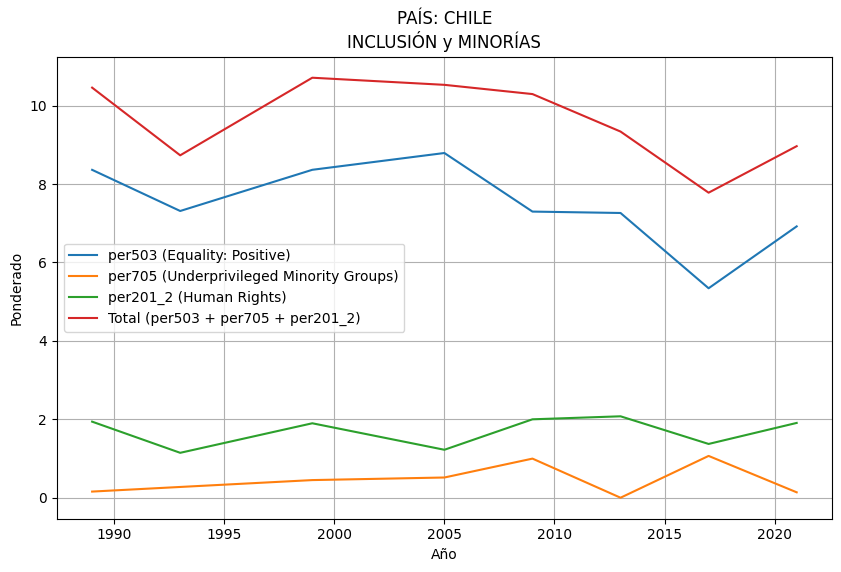

In [8]:
# Define variables for the columns
tema = "INCLUSIÓN y MINORÍAS"
col_1 = 'per503'
col_2 = 'per705'
col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_inclymin = df_Chile_ponderado[['agno', col_1, col_2, col_3]]

# Add a new column 'Total' with the sum of columns
df_Chile_inclymin['Total'] = df_Chile_inclymin[col_1] + df_Chile_inclymin[col_2] + df_Chile_inclymin[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_inclymin.columns[df_Chile_inclymin.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} + {col_2} + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per503.png" alt="" width="450">
  <img src="../assets/per705.png" alt="" width="450"></div>
</div>
<img src="../assets/per201_2.png" alt="" width="500">"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_1], label=label_col_1)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_2], label=label_col_2)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_3], label=label_col_3)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### Aspecto a analizar: ORDEN y CORRUPCIÓN (605_1, -605_2, per304)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_9195/1149047498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_orden['Total'] = df_Chile_orden[col_1] - df_Chile_orden[col_2] + df_Chile_orden[col_3]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per605_1-per605_2.png" alt="" width="450"></div>
  <img src="../assets/per304.png" alt="" width="450">
</div>



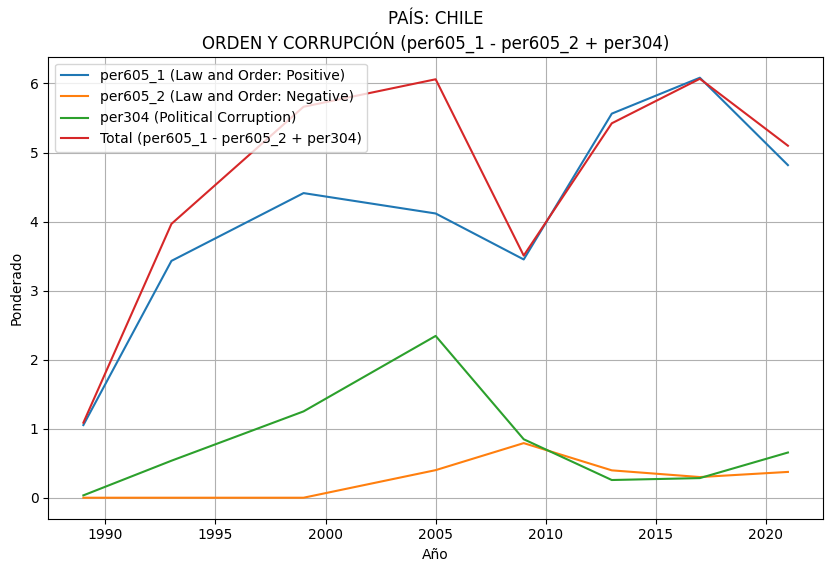

In [17]:
# Define variables for the columns
tema = "ORDEN Y CORRUPCIÓN"
col_1 = 'per605_1'
col_2 = 'per605_2'
col_3 = 'per304'

# Select columns from df_Chile_ponderado
df_Chile_orden = df_Chile_ponderado[['agno', col_1, col_2, col_3]]

# Add a new column 'Total' with the sum of columns
df_Chile_orden['Total'] = df_Chile_orden[col_1] - df_Chile_orden[col_2] + df_Chile_orden[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_orden.columns[df_Chile_orden.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} - {col_2} + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per605_1-per605_2.png" alt="" width="450"></div>
  <img src="../assets/per304.png" alt="" width="450">
</div>

"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_1], label=label_col_1)
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_2], label=label_col_2)
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_3], label=label_col_3)
plt.plot(df_Chile_orden['agno'], df_Chile_orden['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema} ({col_1} - {col_2} + {col_3})')
plt.legend()
plt.grid(True)
plt.show()


<img src="../assets/per304.png" alt="" width="500">

#### Aspecto a analizar: MEDIO AMBIENTE Y SOSTENIBILIDAD (501, 416_2)

<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per503.png" alt="" width="450">
  <img src="../assets/per705.png" alt="" width="400">
</div>
<img src="../assets/per201_2.png" alt="" width="500">

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_4065/205172990.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_medioambiente['Total'] = df_Chile_medioambiente[col_1] + df_Chile_medioambiente[col_2]


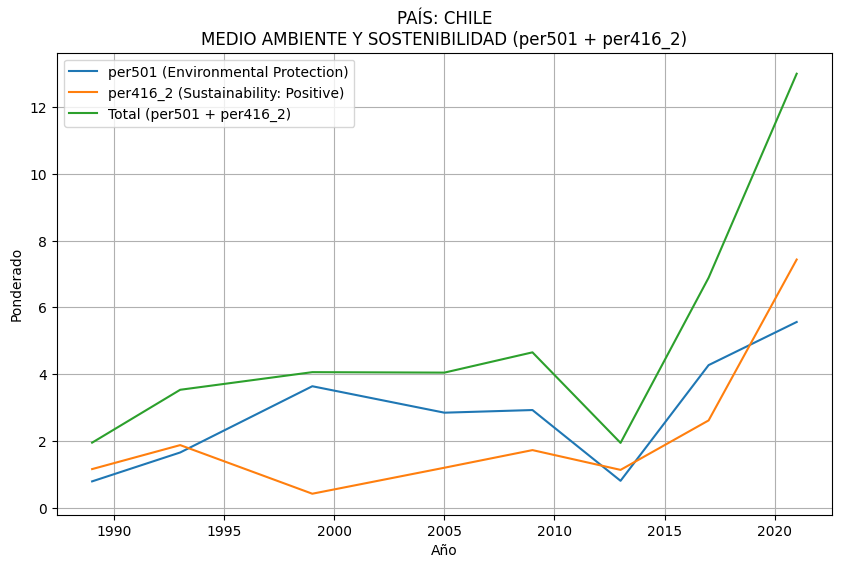

In [10]:
# Define variables for the columns
tema = "MEDIO AMBIENTE Y SOSTENIBILIDAD"
col_1 = 'per501'
col_2 = 'per416_2'

# Select columns from df_Chile_ponderado
df_Chile_medioambiente = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_medioambiente['Total'] = df_Chile_medioambiente[col_1] + df_Chile_medioambiente[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_medioambiente.columns[df_Chile_medioambiente.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})"

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente[col_1], label=label_col_1)
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente[col_2], label=label_col_2)
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema} ({col_1} + {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### Aspecto a analizar: PUEBLOS ORIGINARIOS (607_3, 608_3)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_4065/2594149602.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_poriginarios['Total'] = df_Chile_poriginarios[col_1] - df_Chile_poriginarios[col_2]


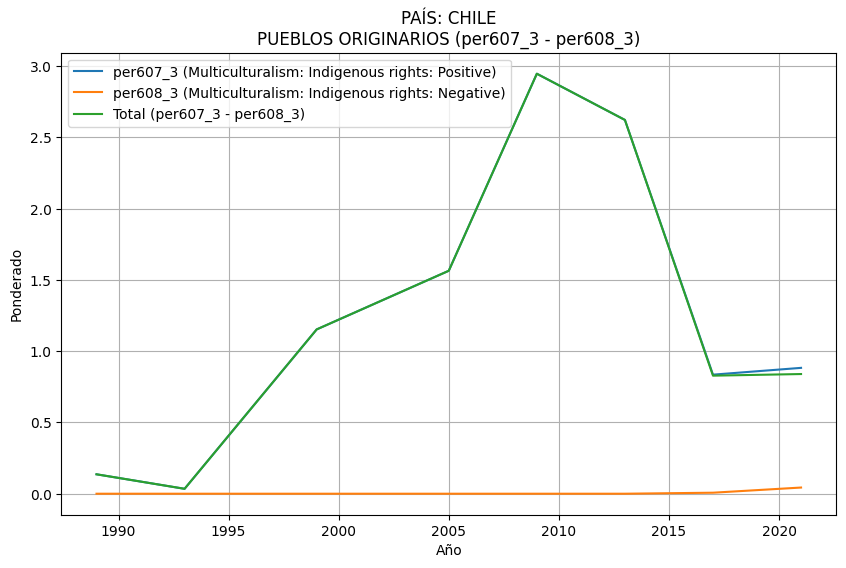

In [11]:
# Define variables for the columns
tema = "PUEBLOS ORIGINARIOS"
col_1 = 'per607_3'
col_2 = 'per608_3'

# Select columns from df_Chile_ponderado
df_Chile_poriginarios = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_poriginarios['Total'] = df_Chile_poriginarios[col_1] - df_Chile_poriginarios[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_poriginarios.columns[df_Chile_poriginarios.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} - {col_2})"

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios[col_1], label=label_col_1)
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios[col_2], label=label_col_2)
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema} ({col_1} - {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### DERECHOS HUMANOS (per201_1, per201_2)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_4065/2617417144.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_hr['Total'] = df_Chile_hr[col_1] + df_Chile_hr[col_2]


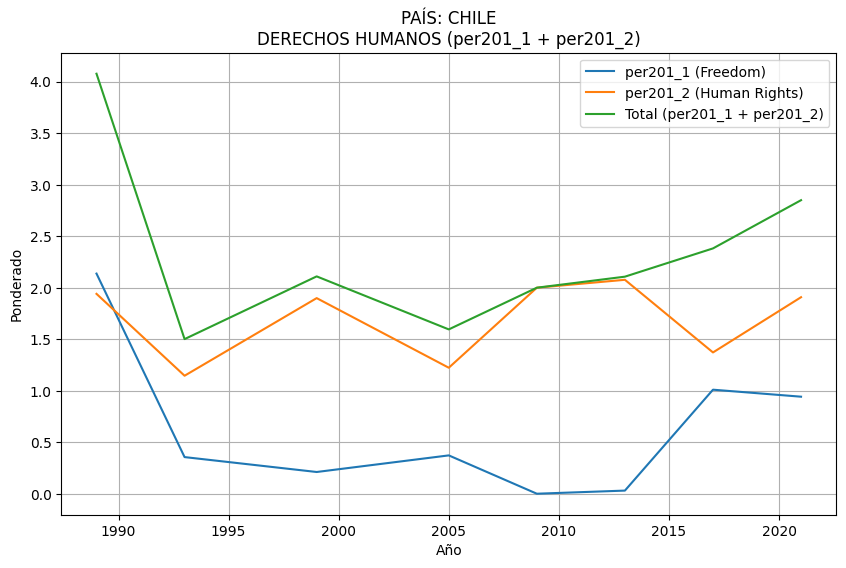

In [12]:
# Define variables for the columns
tema = "DERECHOS HUMANOS"
col_1 = 'per201_1'
col_2 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_hr = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_hr['Total'] = df_Chile_hr[col_1] + df_Chile_hr[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_hr.columns[df_Chile_hr.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})"

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_hr['agno'], df_Chile_hr[col_1], label=label_col_1)
plt.plot(df_Chile_hr['agno'], df_Chile_hr[col_2], label=label_col_2)
plt.plot(df_Chile_hr['agno'], df_Chile_hr['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema} ({col_1} + {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### INMIGRACIÓN (602_2, 607_1)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_4065/3131729682.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_inmigracion['Total'] = df_Chile_inmigracion[col_1] + df_Chile_inmigracion[col_2] #+ df_Chile_inmigracion[col_3]


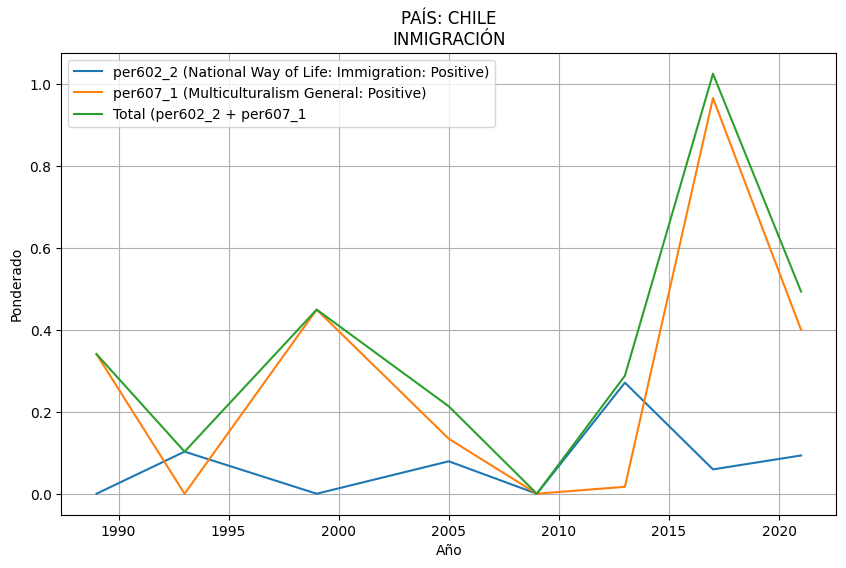

In [13]:
# Define variables for the columns
tema = "INMIGRACIÓN"
col_1 = 'per602_2'
col_2 = 'per607_1'
#col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_inmigracion = df_Chile_ponderado[['agno', col_1, col_2]] #col_3

# Add a new column 'Total' with the sum of columns
df_Chile_inmigracion['Total'] = df_Chile_inmigracion[col_1] + df_Chile_inmigracion[col_2] #+ df_Chile_inmigracion[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_inmigracion.columns[df_Chile_inmigracion.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
#label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} + {col_2}" # + {col_3})"

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_1], label=label_col_1)
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_2], label=label_col_2)
#plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_3], label=label_col_3)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inmigracion['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### MORAL TRADICIONAL (603, 604)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_4065/3941021045.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_moral['Total'] = df_Chile_moral[col_1] - df_Chile_moral[col_2] #+ df_Chile_moral[col_3]


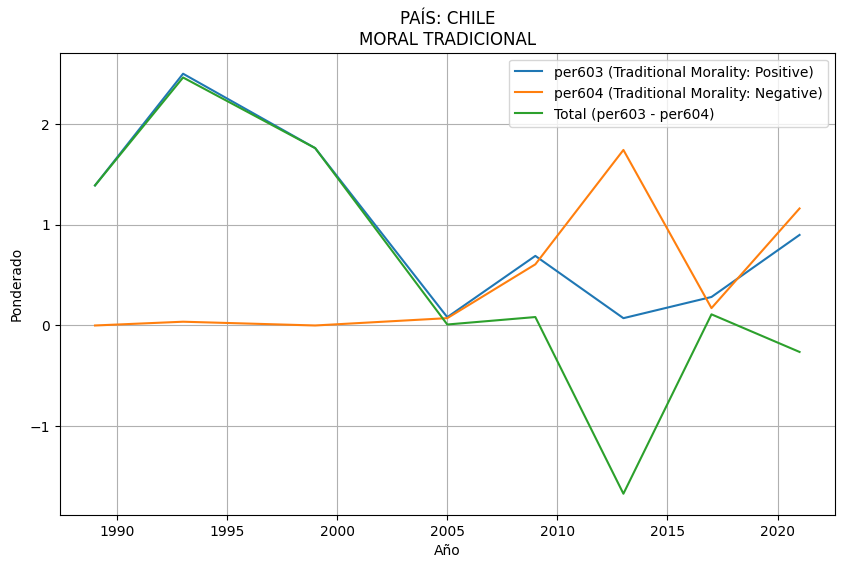

In [14]:
# Define variables for the columns
tema = "MORAL TRADICIONAL"
col_1 = 'per603'
col_2 = 'per604'
#col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_moral = df_Chile_ponderado[['agno', col_1, col_2]] #col_3

# Add a new column 'Total' with the sum of columns
df_Chile_moral['Total'] = df_Chile_moral[col_1] - df_Chile_moral[col_2] #+ df_Chile_moral[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_moral.columns[df_Chile_moral.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
#label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} - {col_2})" # + {col_3})"

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_1], label=label_col_1)
plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_2], label=label_col_2)
#plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_3], label=label_col_3)
plt.plot(df_Chile_moral['agno'], df_Chile_moral['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### GRÁFICO RESUMEN

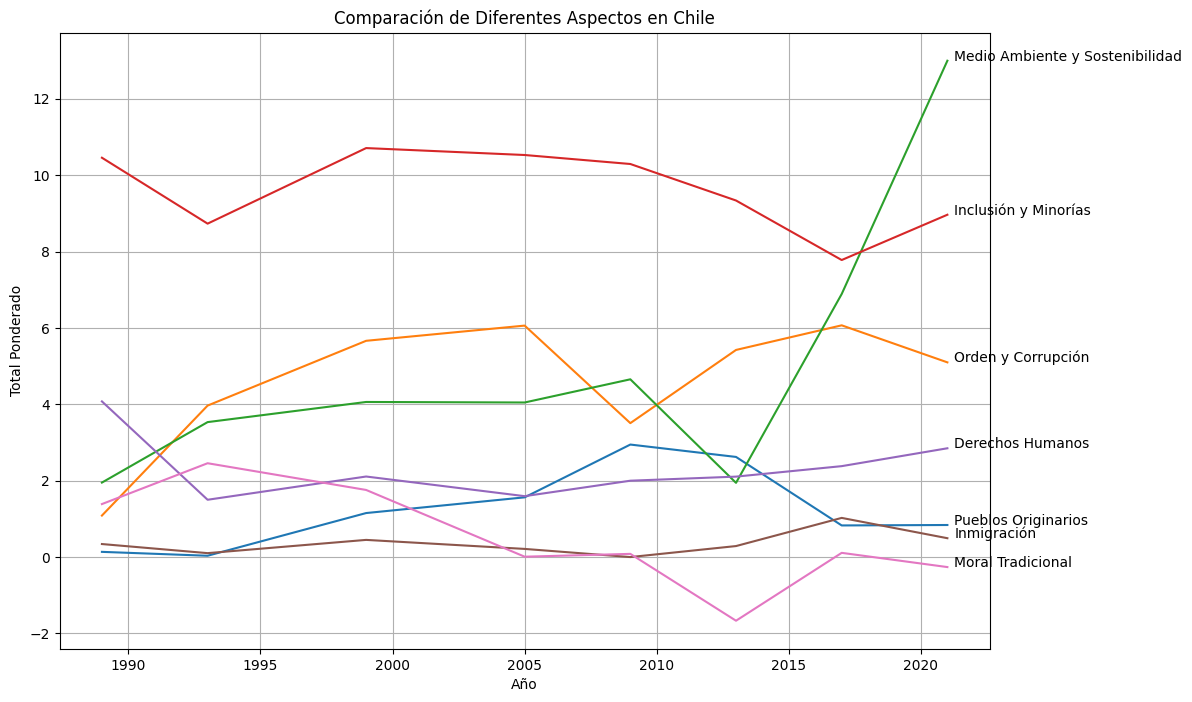

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Plot
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios['Total'], label='Pueblos Originarios')
plt.plot(df_Chile_orden['agno'], df_Chile_orden['Total'], label='Orden y Corrupción')
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente['Total'], label='Medio Ambiente y Sostenibilidad')
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label='Inclusión y Minorías')
plt.plot(df_Chile_hr['agno'], df_Chile_hr['Total'], label='Derechos Humanos')
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion['Total'], label='Inmigración')
plt.plot(df_Chile_moral['agno'], df_Chile_moral['Total'], label='Moral Tradicional')

# Etiquetas al final de cada línea
plt.annotate('Pueblos Originarios', xy=(df_Chile_poriginarios['agno'].values[-1], df_Chile_poriginarios['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Orden y Corrupción', xy=(df_Chile_orden['agno'].values[-1], df_Chile_orden['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Medio Ambiente y Sostenibilidad', xy=(df_Chile_medioambiente['agno'].values[-1], df_Chile_medioambiente['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Inclusión y Minorías', xy=(df_Chile_inclymin['agno'].values[-1], df_Chile_inclymin['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Derechos Humanos', xy=(df_Chile_hr['agno'].values[-1], df_Chile_hr['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Inmigración', xy=(df_Chile_inmigracion['agno'].values[-1], df_Chile_inmigracion['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Moral Tradicional', xy=(df_Chile_moral['agno'].values[-1], df_Chile_moral['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Total Ponderado')
plt.title('Comparación de Diferentes Aspectos en Chile')
plt.legend().set_visible(False)  # Oculta la leyenda ya que las etiquetas están al final de las líneas
plt.grid(True)

plt.show()


### TODOS LOS DOMINIOS

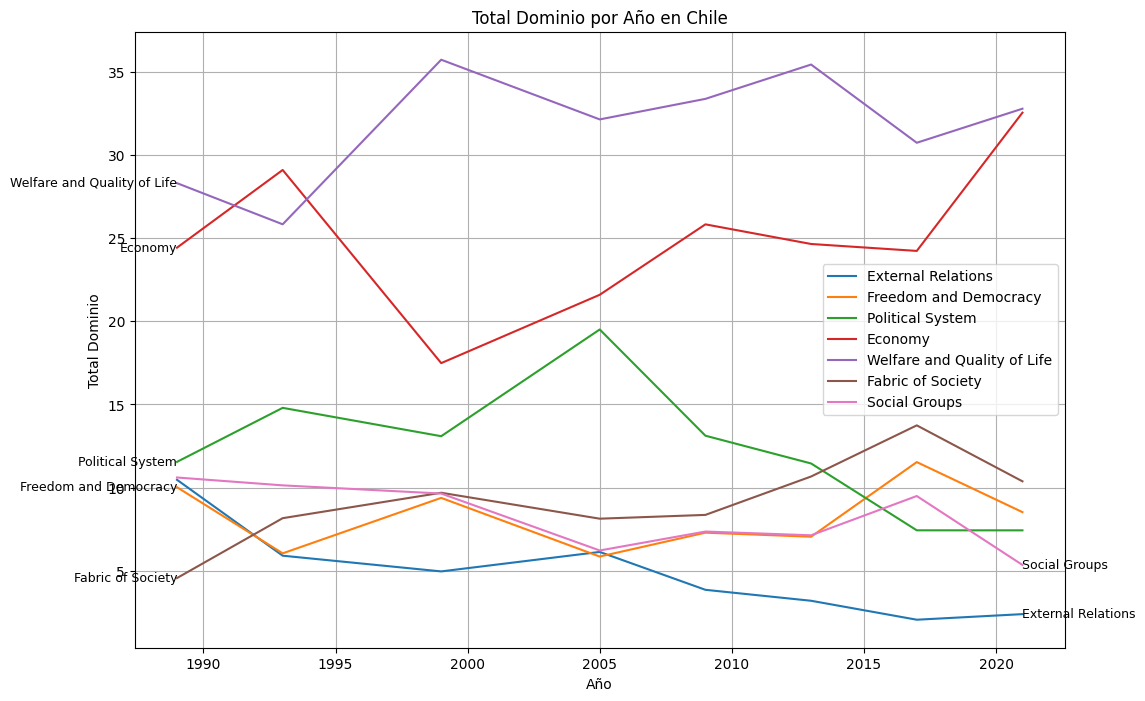

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dataframe to store the results
df_Chile_dom = pd.DataFrame()

# Loop through each unique 'Dominio' in 'df_AD'
for dominio in df_AD['Dominio'].unique():
    # Create list 'columnas_per' with values of 'Variable_per' for that 'Dominio' considering only columns with name length == 6
    columnas_per = df_AD[(df_AD['Dominio'] == dominio) & (df_AD['Variable_per'].str.len() == 6)]['Variable_per'].tolist()
    
    # Sum the columns with names in 'columnas_per' for each 'agno' in 'df_Chile_ponderado'
    df_Chile_ponderado['tot_dom'] = df_Chile_ponderado[columnas_per].sum(axis=1)
    
    # Create a temporary dataframe with 'agno', 'Dominio', and 'tot_dom'
    temp_df = df_Chile_ponderado[['agno', 'tot_dom']].copy()
    temp_df['Dominio'] = dominio
    
    # Append the temporary dataframe to 'df_Chile_dom'
    df_Chile_dom = pd.concat([df_Chile_dom, temp_df], ignore_index=True)
    
    # Reset 'columnas_per' for the next loop iteration
    columnas_per = []

# Merge 'df_Chile_dom' with 'df_AD' to get 'Nombre_Dominio'
df_Chile_dom = df_Chile_dom.merge(df_AD[['Dominio', 'Nombre_Dominio']].drop_duplicates(), on='Dominio', how='left')

# Plot the dataframe 'df_Chile_dom' with 'agno' on the horizontal axis and 'tot_dom' on the vertical axis
plt.figure(figsize=(12, 8))

for dominio in df_Chile_dom['Dominio'].unique():
    subset = df_Chile_dom[df_Chile_dom['Dominio'] == dominio]
    
    # Plot the line for each 'Dominio'
    plt.plot(subset['agno'], subset['tot_dom'], label=subset['Nombre_Dominio'].iloc[0])
    
    # Check if 'Dominio' is 'Social Groups' or 'Freedom and Democracy' and place the label at the end
    if dominio in ['Domain_7', 'Domain_1']:
        plt.text(subset['agno'].iloc[-1], subset['tot_dom'].iloc[-1], subset['Nombre_Dominio'].iloc[0], 
                 fontsize=9, ha='left', va='center')
    else:
        # Place the label at the start for other dominios
        plt.text(subset['agno'].iloc[0], subset['tot_dom'].iloc[0], subset['Nombre_Dominio'].iloc[0], 
                 fontsize=9, ha='right', va='center')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Total Dominio')
plt.title('Total Dominio por Año en Chile')
plt.legend()
plt.grid(True)
plt.show()


### *** MODIFICAR CÓDIGO PARA USAR PRESVOTE O PERVOTE SEGÚN SEA EL CASO
### *** evaluar agregar 'continente'
### *** Ver para Chile los 7 dominios

#### Alemania

In [17]:
df_Alemania = df[df['countryname'] == 'Germany']

df_Alemania = df_Alemania.sort_values(by='agno')

# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns_4digit = [col for col in df.columns if col.startswith('per') and col[3].isdigit()]

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_4digit' using column 'presvote' as weights
df_Alemania_ponderado = df_Alemania.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['pervote']) for col in per_columns_4digit})
).reset_index()

# Display the results
df_Alemania_ponderado.head()

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1949,1.151948,2.472702,0.0,0.120293,0.291606,0.207928,0.069289,1.082162,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1953,3.020712,0.555393,0.0,0.826984,0.437284,1.161031,0.041421,2.715646,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1957,4.783425,1.003888,0.0,3.298744,6.580846,1.244326,0.502114,3.499646,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1961,5.800360,2.040600,0.0,3.924717,1.914137,0.000000,3.283657,1.690999,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1965,9.107959,1.393901,0.0,1.928386,0.418171,1.812692,1.323660,4.575641,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_4065/3453244782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alemania_inclymin['Total'] = df_Alemania_inclymin['per503'] + df_Alemania_inclymin['per705']


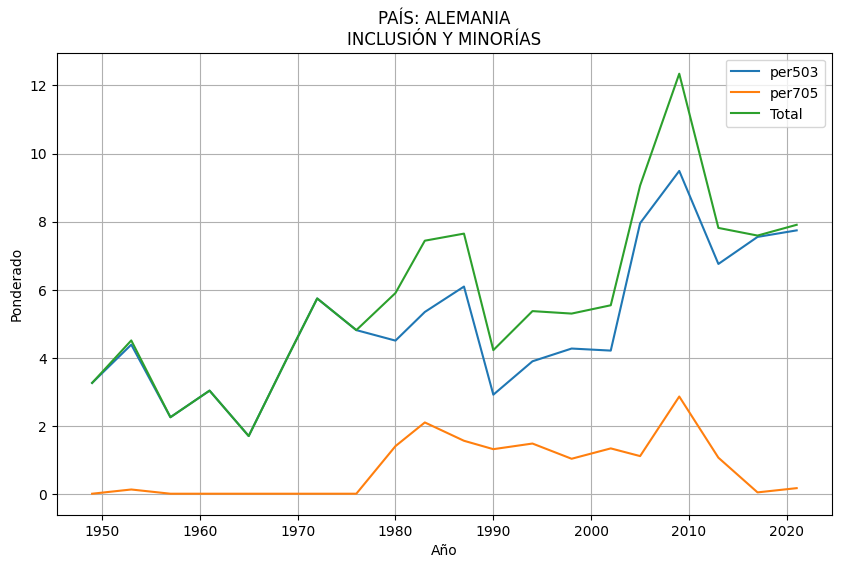

In [18]:
# Create dataframe
df_Alemania_inclymin = df_Alemania_ponderado[['agno', 'per503', 'per705']]

# Add a new column 'Total' with the sum of columns 'per503' and 'per705'
df_Alemania_inclymin['Total'] = df_Alemania_inclymin['per503'] + df_Alemania_inclymin['per705']

# Plot columns per503, per705, Total with agno in the horizontal axis
plt.figure(figsize=(10, 6))
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['per503'], label='per503')
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['per705'], label='per705')
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['Total'], label='Total')

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title('PAÍS: ALEMANIA\nINCLUSIÓN Y MINORÍAS')
plt.legend()
plt.grid(True)
plt.show()

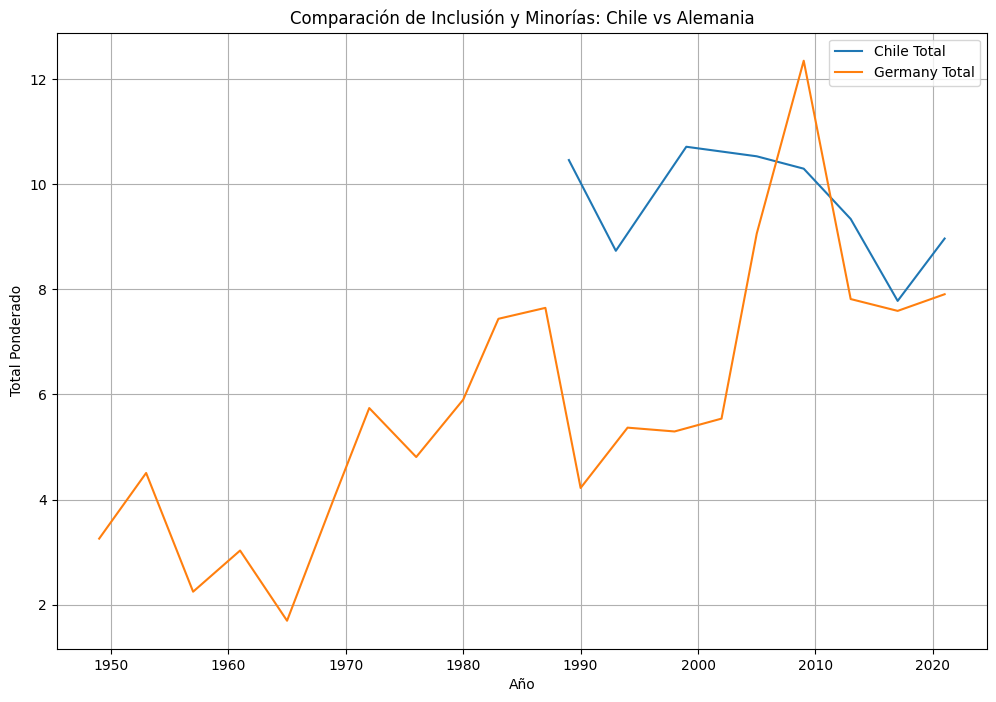

In [19]:
plt.figure(figsize=(12, 8))

# Plot 'Total' for Chile
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label='Chile Total')

# Plot 'Total' for Germany
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['Total'], label='Germany Total')

plt.xlabel('Año')
plt.ylabel('Total Ponderado')
plt.title('Comparación de Inclusión y Minorías: Chile vs Alemania')
plt.legend()
plt.grid(True)
plt.show()

### Diferencia entre Chile y Alemania

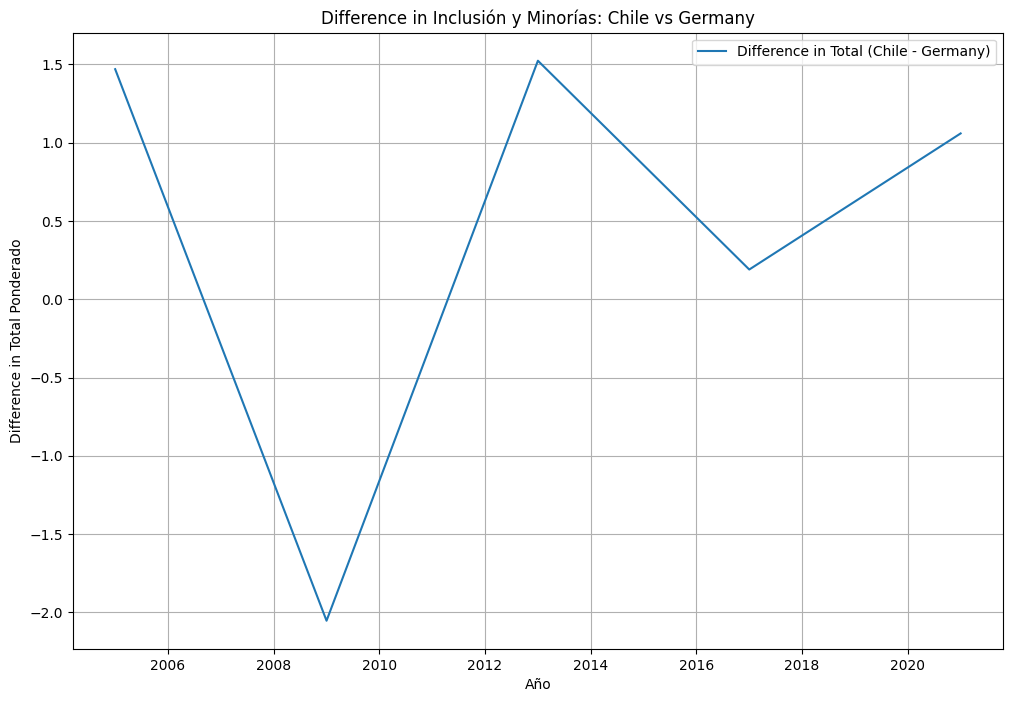

In [20]:
# Merge the two dataframes on 'agno'
df_comparison = pd.merge(df_Chile_inclymin, df_Alemania_inclymin, on='agno', suffixes=('_Chile', '_Germany'))

# Calculate the difference between 'Total' for Chile and Germany
df_comparison['Total_Difference'] = df_comparison['Total_Chile'] - df_comparison['Total_Germany']

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(df_comparison['agno'], df_comparison['Total_Difference'], label='Difference in Total (Chile - Germany)')

plt.xlabel('Año')
plt.ylabel('Difference in Total Ponderado')
plt.title('Difference in Inclusión y Minorías: Chile vs Germany')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
df_comparison

,agno,per503_Chile,per705_Chile,per201_2,Total_Chile,per503_Germany,per705_Germany,Total_Germany,Total_Difference
0,2005,8.789974,0.515604,1.222722,10.528299,7.952611,1.106164,9.058775,1.469524
1,2009,7.296178,0.997248,1.999458,10.292885,9.488878,2.857155,12.346033,-2.053149
2,2013,7.260687,0.000000,2.076149,9.336836,6.754007,1.059384,7.813391,1.523445
3,2017,5.341153,1.065976,1.371141,7.778271,7.549090,0.039297,7.588387,0.189883
4,2021,6.918945,0.138109,1.907213,8.964267,7.741342,0.163837,7.905180,1.059088


#### Veamos la similaridad entre candidatos chilenos en suma de variables 503, 705, 201_2

In [22]:
# Create list named 'variables'
variables = ['per503', 'per705', 'per201_2']

# Create dataframe 'df_Chile_serie_temporal' with columns 'agno', 'candidatename', and columns included in list 'variables'
df_Chile_serie_temporal = df_Chile[['agno', 'candidatename'] + variables]

# Create list 'candidatos_Chile' with unique values of column 'candidatename'
candidatos_Chile = df_Chile['candidatename'].unique()

# Create dataframe 'df_Chile_serie' with columns 'agno' and columns with the names in 'candidatos_Chile'
df_Chile_serie = pd.DataFrame({'agno': df_Chile['agno'].unique()})
for candidato in candidatos_Chile:
    df_Chile_serie[candidato] = np.nan

# Add column 'Total' to 'df_Chile_serie_temporal' with the sum of columns different from 'agno' and 'candidatename'
df_Chile_serie_temporal['Total'] = df_Chile_serie_temporal[variables].sum(axis=1)

# Fill 'df_Chile_serie' with values in column 'Total' of 'df_Chile_serie_temporal', for each 'agno' and 'candidatename'
for _, row in df_Chile_serie_temporal.iterrows():
    df_Chile_serie.loc[df_Chile_serie['agno'] == row['agno'], row['candidatename']] = row['Total']

df_Chile_serie

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_4065/3156384853.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_serie_temporal['Total'] = df_Chile_serie_temporal[variables].sum(axis=1)


,agno,Patricio Aylwin Azocar,Hernán Büchi Buc,Francisco Javier Errázuriz Talavera,Eduardo Frei Ruiz-Tagle,Arturo Alessandri Besa,Ricardo Lagos Escobar,Joaquin Lavin Infante,Michelle Bachelet Jeria,Tomás Hirsch Goldschmidt,...,Marco Enriquez-Ominami,Evelyn Matthei Fornet,José Antonio Kast Rist,Carolina Goic Boroevic,Beatriz de Jesús Sánchez Muñoz,Alejandro René Eleodoro Guillier Álvarez,Gabriel Boric Font,Yasna Provoste Campillay,Sebastián Iglesias Sichel Ramirez,Franco Aldo Parisi Fernández
0,1989,10.822,4.014,21.429,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,NaN,NaN,NaN,10.443,4.665,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999,NaN,NaN,NaN,NaN,NaN,12.5,8.824,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,NaN,NaN,NaN,NaN,NaN,NaN,17.568,9.638,11.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,NaN,NaN,NaN,11.635,NaN,NaN,NaN,NaN,NaN,...,19.517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.770,NaN,...,11.882,3.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.150,NaN,5.151,9.355,11.118,7.998,NaN,NaN,NaN,NaN
7,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.640,NaN,3.250,NaN,NaN,NaN,12.125,10.956,10.814,6.835


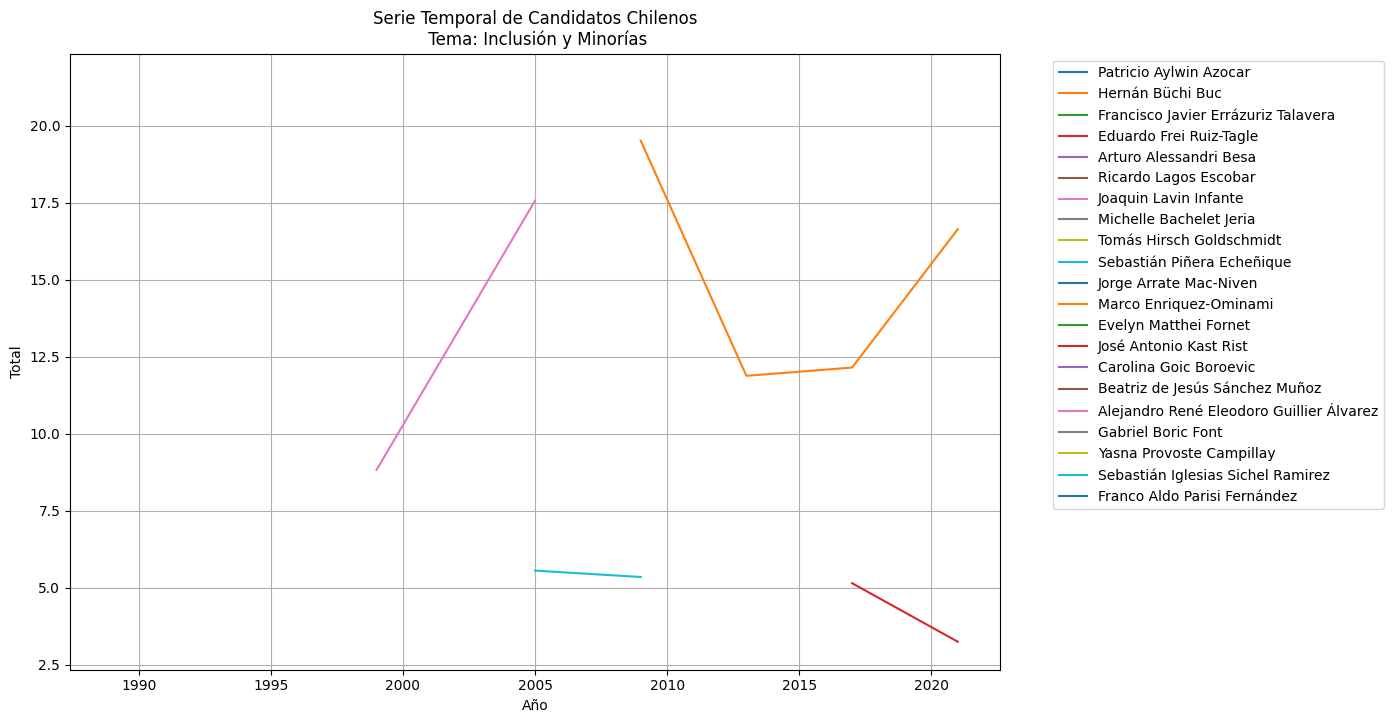

In [23]:
plt.figure(figsize=(12, 8))

# Plot each candidate's 'Total' over the years
for candidato in df_Chile_serie.columns[1:]:
    plt.plot(df_Chile_serie['agno'], df_Chile_serie[candidato], label=candidato)

plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Serie Temporal de Candidatos Chilenos\n Tema: Inclusión y Minorías')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Agreguemos todos los candidatos chilenos en las variables 503, 705, 201_2